# Decision Tree Classifier on Customer Churn Data

### Introduction

A decision tree classifier is a machine learning algorithm used for classification tasks. It divides the data into subsets based on feature values, forming a tree-like structure where each internal node represents a decision based on a feature, and each leaf node corresponds to a predicted class label. The tree is built through recursive partitioning, optimizing for the best splits that maximize class separation. Decision trees are interpretable, handle both categorical and numerical data, and can capture complex relationships in the data. However, they might suffer from overfitting, which can be mitigated using techniques like pruning.

### Decision Tree Algorithm 

In a decision tree, for predicting the class of the given dataset, the algorithm starts from the root node of the tree. This algorithm compares the values of root attribute with the record (real dataset) attribute and, based on the comparison, follows the branch and jumps to the next node.

For the next node, the algorithm again compares the attribute value with the other sub-nodes and move further. It continues the process until it reaches the leaf node of the tree.

<img src= "https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png" width=450 height=250/>

- **Root Node:** Root node is from where the decision tree starts. It represents the entire dataset, which further gets divided into two or more homogeneous sets.
- **Leaf Node:** Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node.
- **Splitting:** Splitting is the process of dividing the decision node/root node into sub-nodes according to the given conditions.
- **Branch/Sub Tree:** A tree formed by splitting the tree.
- **Pruning:** Pruning is the process of removing the unwanted branches from the tree.
- **Parent/Child node:** The root node of the tree is called the parent node, and other nodes are called the child nodes.

### Advantages and Disadvantages

**Advantages of Decision Trees:**
- **Interpretability:** Decision trees offer intuitive visualizations that are easy to understand and interpret
- **Handling Non-Linearity:** Decision trees can capture complex, non-linear relationships in data without relying on assumptions about the underlying distribution, making them suitable for various types of datasets.
- **Mixed Data Types:** They handle both categorical and numerical features naturally, reducing the need for extensive preprocessing and encoding.

**Disadvantages of Decision Trees:**
- **Overfitting:** Decision trees can become overly complex and memorize noise in the training data, leading to poor generalization on unseen data. Regularization techniques and pruning are required to mitigate overfitting.
- **Instability:** Small variations in the data can lead to significantly different tree structures, making decision trees somewhat unstable and sensitive to noise.
- **Bias Towards Dominant Classes:** In imbalanced datasets, decision trees tend to favor majority classes, potentially resulting in suboptimal predictions for minority classes. Techniques like class weighting or resampling are needed to address this bias.

### Objective

##### Predict the churn rate based on behaviour  of customers for a  telecom dataset using Decision Tree Algorithm

####  Data Information

The Orange Telecom's Churn Dataset, which consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription, will be used to develop predictive models

## Index of Content

1. Data Exploration
2. Data Preprocessing
3. Feature Selection
4. Build and Train the Decision Tree Classifier

In [52]:
# Importing Models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree

In [53]:
# Loading the dataset
df = pd.read_csv("C:/Users/Prath/OneDrive/Documents/Datasets/telecom_churn.csv")

### 1. Data Exploration

In [54]:
df.head().style.background_gradient(cmap="Purples",axis=None)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.500000,97,31.370000,351.600000,80,29.890000,215.800000,90,9.710000,8.700000,4,2.350000,1,False
1,IN,65,415,No,No,0,129.100000,137,21.950000,228.500000,83,19.420000,208.800000,111,9.400000,12.700000,6,3.430000,4,True
2,NY,161,415,No,No,0,332.900000,67,56.590000,317.800000,97,27.010000,160.600000,128,7.230000,5.400000,9,1.460000,4,True
3,SC,111,415,No,No,0,110.400000,103,18.770000,137.300000,102,11.670000,189.600000,105,8.530000,7.700000,6,2.080000,2,False
4,HI,49,510,No,No,0,119.300000,117,20.280000,215.100000,109,18.280000,178.700000,90,8.040000,11.100000,1,3.000000,1,False


In [56]:
df.shape

(667, 20)

In [4]:
# Check for missing values
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [5]:
# Summary statistics
df.describe().style.background_gradient(cmap="Purples",axis=None)

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


In [6]:
# Check data types
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

### 2. Data Preprocessing

In [7]:
# Identify categorical columns in the dataset
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [8]:
encoder = OneHotEncoder(sparse=False, drop='first')  # Use drop='first' to avoid multicollinearity
encoded_cols = encoder.fit_transform(df[categorical_cols])

In [9]:
# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names(categorical_cols))

C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [10]:
df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)
df.head().style.background_gradient(cmap="Purples",axis=None)

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes
0,117,408,0,184.500000,97,31.370000,351.600000,80,29.890000,215.800000,90,9.710000,8.700000,4,2.350000,1,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,65,415,0,129.100000,137,21.950000,228.500000,83,19.420000,208.800000,111,9.400000,12.700000,6,3.430000,4,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,161,415,0,332.900000,67,56.590000,317.800000,97,27.010000,160.600000,128,7.230000,5.400000,9,1.460000,4,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,111,415,0,110.400000,103,18.770000,137.300000,102,11.670000,189.600000,105,8.530000,7.700000,6,2.080000,2,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,49,510,0,119.300000,117,20.280000,215.100000,109,18.280000,178.700000,90,8.040000,11.100000,1,3.000000,1,False,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### Splitting into testing and training sets:

In [11]:
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Feature Selection

In [12]:
# Create a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Get feature importances from the trained Decision Tree model
feature_importances = clf.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
top_n=10
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

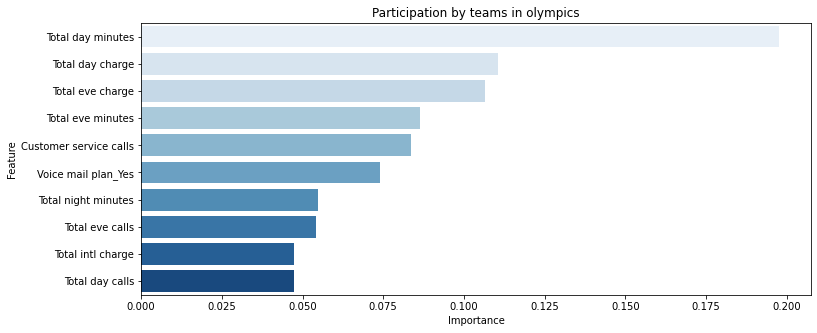

In [13]:
sns.set_palette("Blues",10)
plt.figure(figsize=(12,5))
plt.title("Participation by teams in olympics")
sns.barplot(x='Importance',y='Feature',data=feature_importance_df.head(top_n));

In [14]:
# Select the top N features for your model
selected_features = feature_importance_df['Feature'].head(top_n).tolist()

scaler = StandardScaler()
# Subset your training and testing data to include only the selected features
X_train_selected = scaler.fit_transform(X_train[selected_features])
X_test_selected = scaler.transform(X_test[selected_features])

### 4. Build and Train the Decision Tree Classifier

In [15]:
# Create a Decision Tree classifier
clf_selected_features = DecisionTreeClassifier(random_state=42)

# Train the classifier on the selected feature training data
clf_selected_features.fit(X_train_selected, y_train)

DecisionTreeClassifier(random_state=42)

###  5. Evaluate the Model

In [16]:
# Predictions on the test set using the model with selected features
y_pred_selected = clf_selected_features.predict(X_test_selected)

# Calculate accuracy
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print(f"Accuracy with selected features: {accuracy_selected:.2f}")

# Generate a classification report
report_selected = classification_report(y_test, y_pred_selected)
print(report_selected)

# Generate a confusion matrix
conf_matrix_selected = confusion_matrix(y_test, y_pred_selected)
print(conf_matrix_selected)

Accuracy with selected features: 0.88
              precision    recall  f1-score   support

       False       0.97      0.89      0.93       119
        True       0.48      0.80      0.60        15

    accuracy                           0.88       134
   macro avg       0.73      0.85      0.76       134
weighted avg       0.92      0.88      0.89       134

[[106  13]
 [  3  12]]


#### Decision Tree Classifier with criterion gini index

In [17]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
# fit the model
clf_gini.fit(X_train_selected, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [18]:
y_pred_gini = clf_gini.predict(X_test_selected)

from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9552


In [19]:
y_pred_train_gini = clf_gini.predict(X_train_selected)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9231


In [20]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(X_train_selected, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test_selected, y_test)))

Training set score: 0.9231
Test set score: 0.9552


#### Decision Tree Classifier with criterion entropy 

In [27]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_en.fit(X_train_selected, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [28]:
y_pred_en = clf_en.predict(X_test_selected)

In [29]:
 from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))


Model accuracy score with criterion entropy: 0.9627


In [30]:
y_pred_train_en = clf_en.predict(X_train_selected)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9193


In [31]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train_selected, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test_selected, y_test)))

Training set score: 0.9193
Test set score: 0.9627


C:\Users\Prath\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


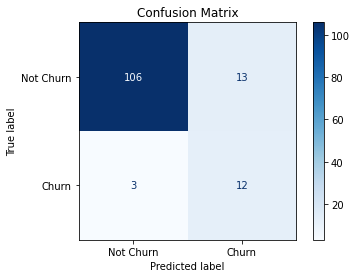

In [32]:
plot_confusion_matrix(clf_selected_features, X_test_selected, y_test, display_labels=['Not Churn', 'Churn'], cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

### 6. Visualize the Decision Tree

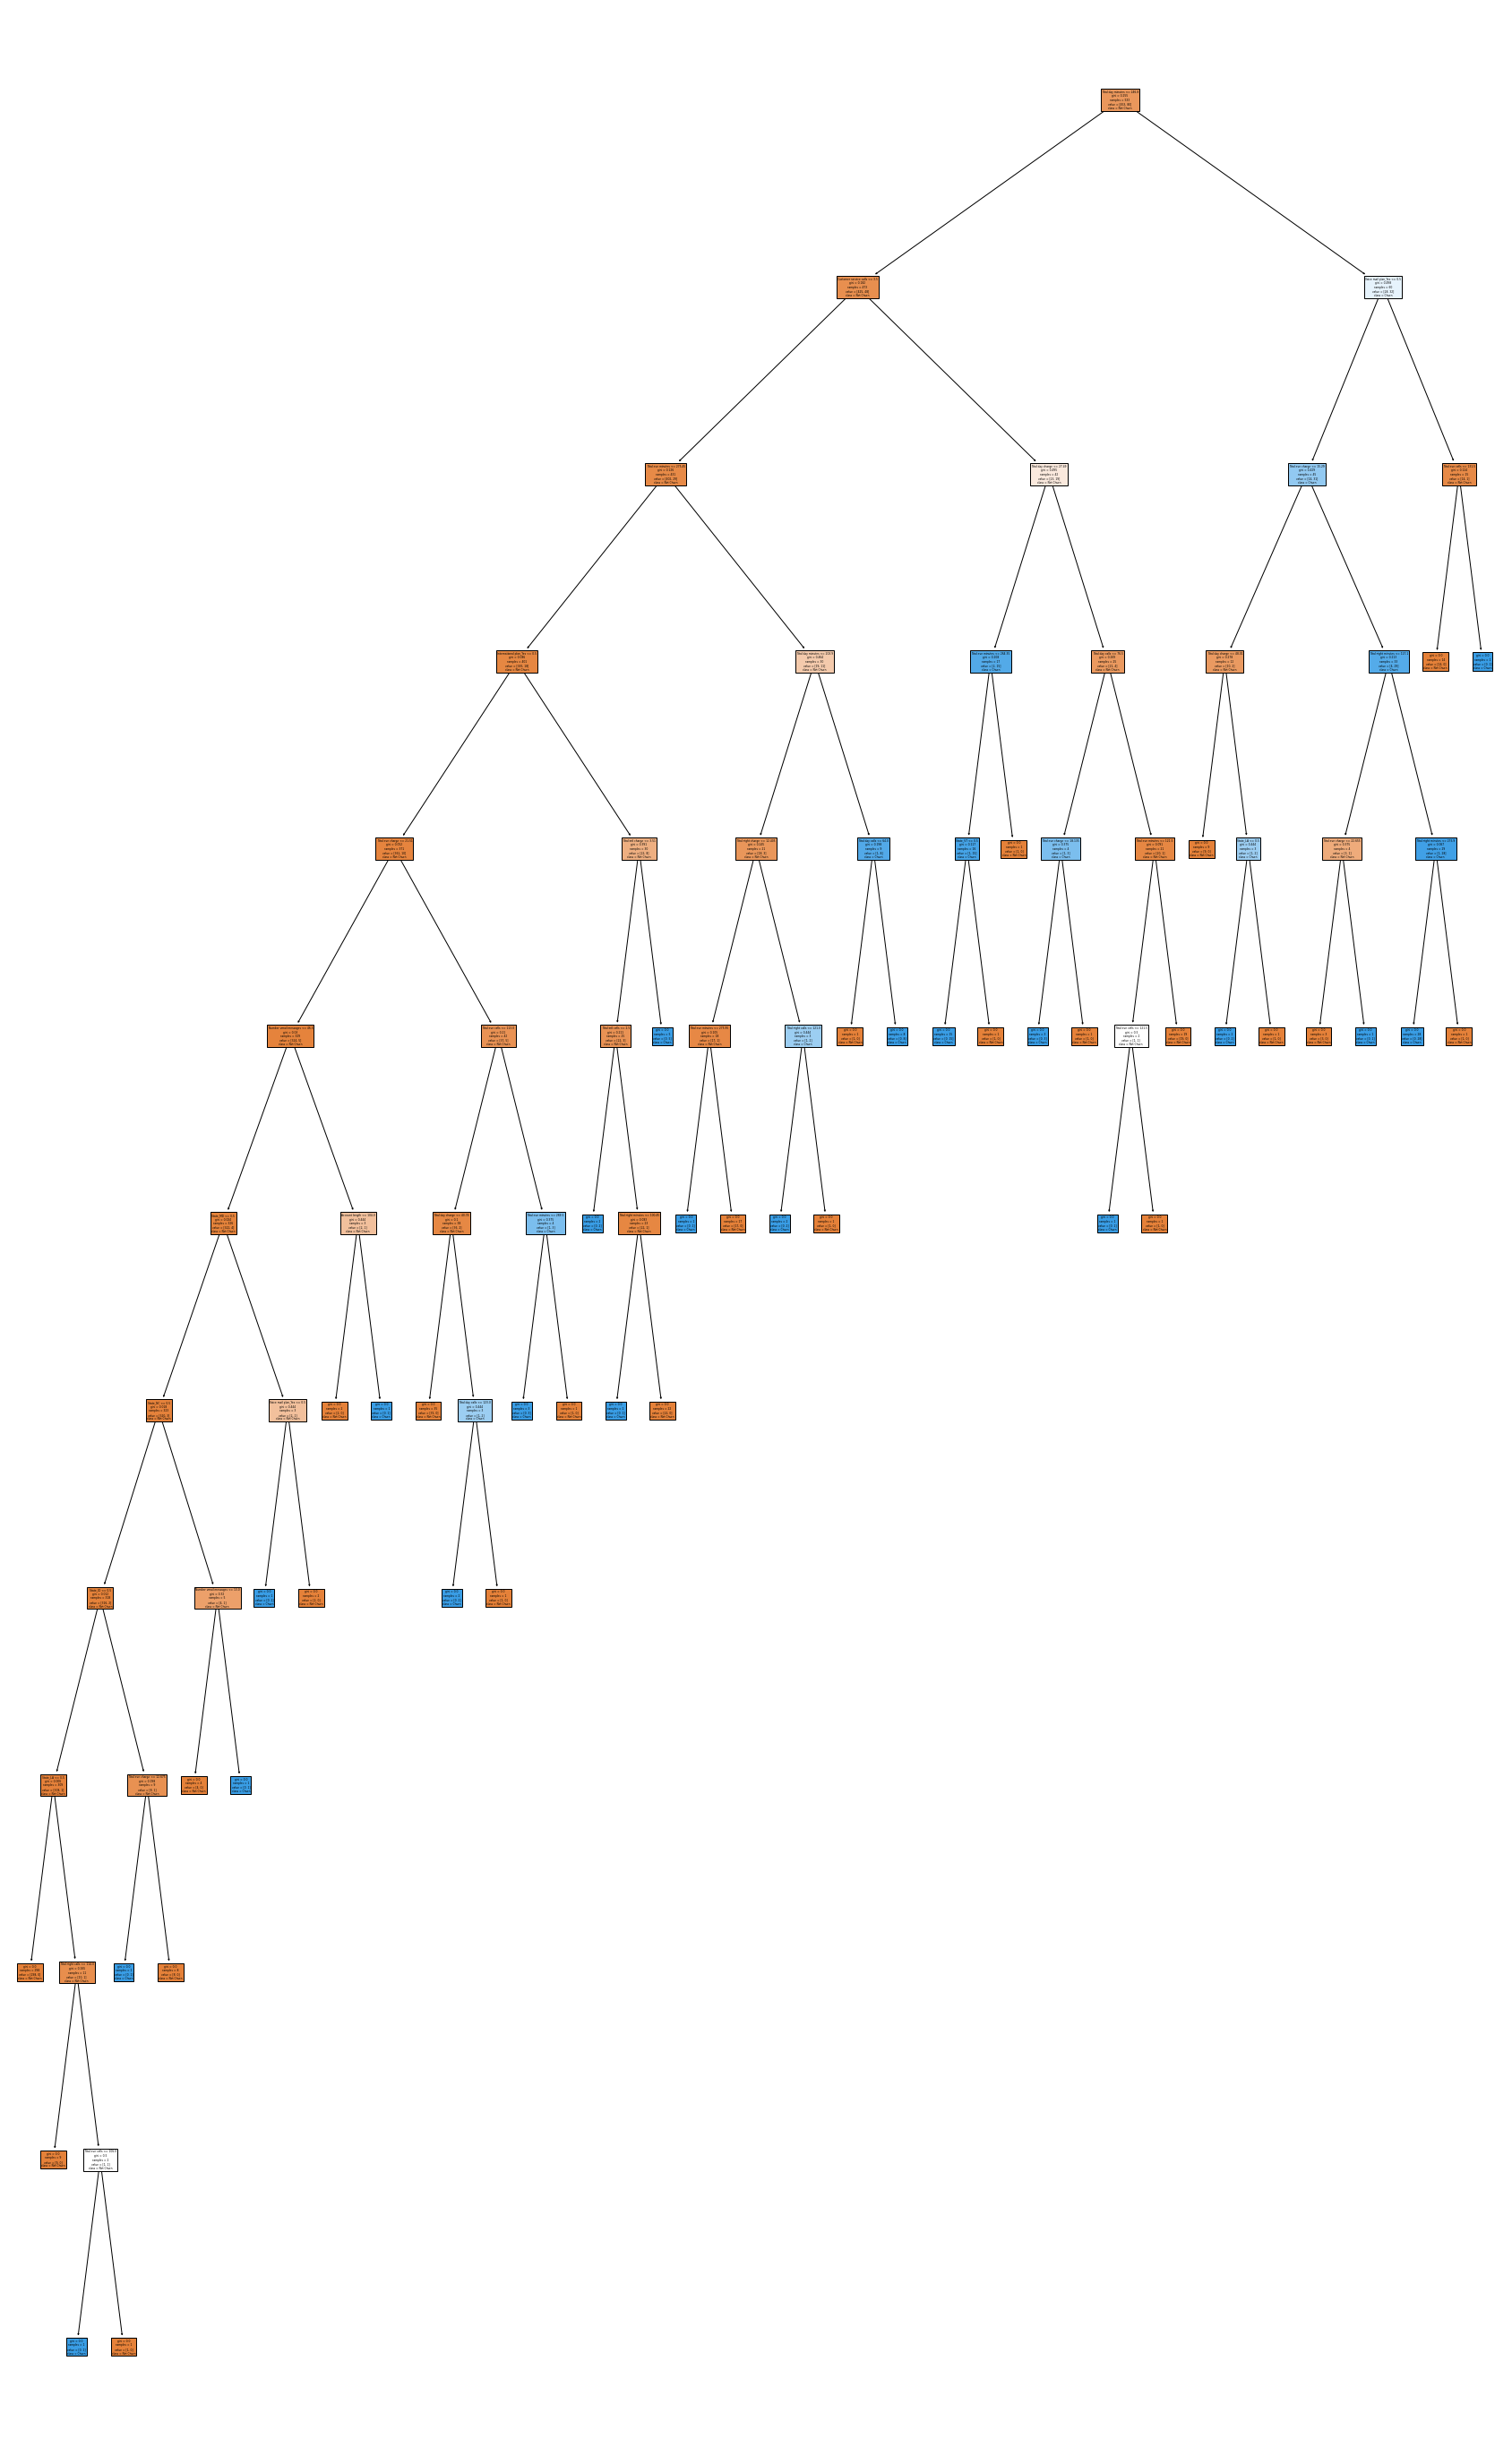

In [33]:
# Visualize the Decision Tree
plt.figure(figsize=(30, 50))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Churn', 'Churn'])
plt.show()

In [34]:
accuracy = accuracy_score(y_test, y_pred_selected)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 88.06%


In [36]:
y_train_pred = clf_selected_features.predict(X_train_selected)
y_test_pred  = clf_selected_features.predict(X_test_selected)

In [37]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=['Not Churn', 'Churn']
               ,xticklabels=['Not Churn', 'Churn'],cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 1.0
Test score 0.8805970149253731
Train Confusion matrix


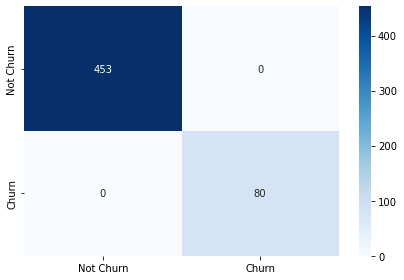

Test Confusion matrix


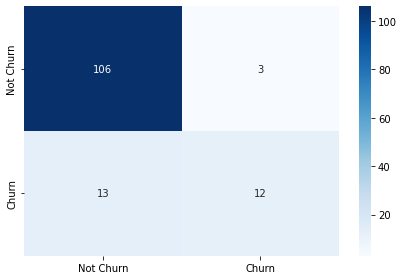

In [38]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

#### Prepruning

In [39]:
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train_selected,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

Train score 0.9474671669793621
Test score 0.9477611940298507
Train Confusion matrix


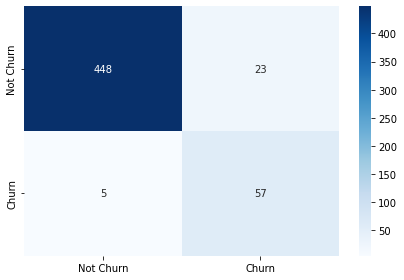

Test Confusion matrix


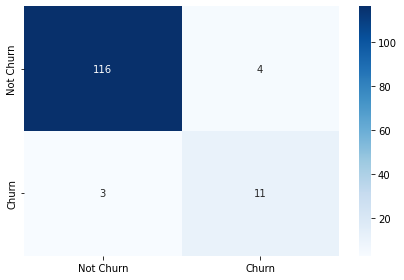

In [40]:
model = gcv.best_estimator_
model.fit(X_train_selected,y_train)
y_train_pred = model.predict(X_train_selected)
y_test_pred = model.predict(X_test_selected)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [41]:
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 94.78%


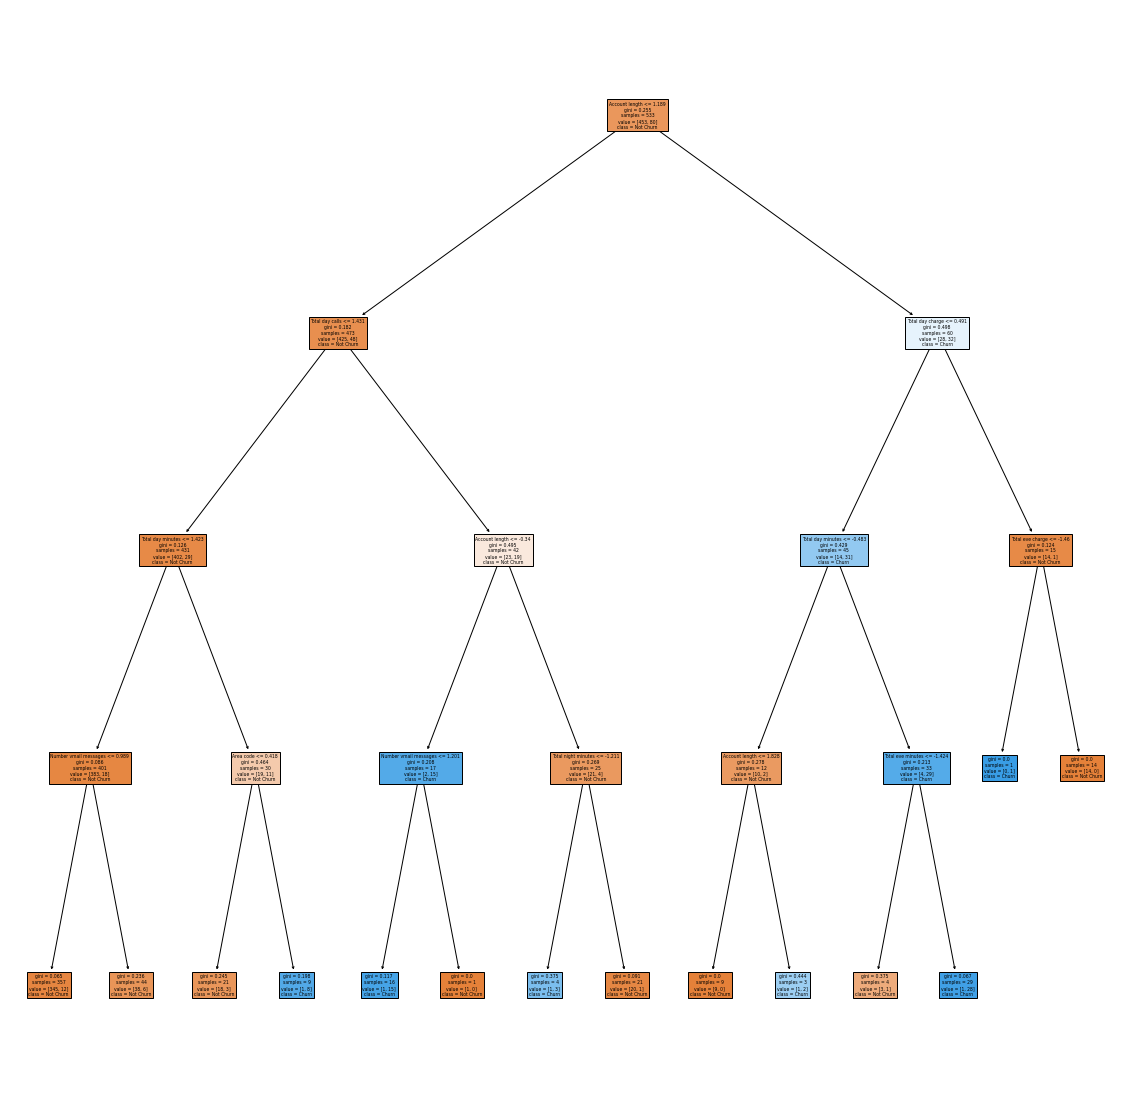

In [42]:
plt.figure(figsize=(20,20))
features = X.columns
classes = ['Not Churn', 'Churn']
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

#### Post-Pruning

In [43]:
path = clf.cost_complexity_pruning_path(X_train_selected, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00124494 0.00175891 0.00178683 0.00179089 0.00180917
 0.00181754 0.00182547 0.00183071 0.00250156 0.00250156 0.00250156
 0.00265937 0.00281426 0.00281426 0.00281426 0.00310396 0.00333542
 0.00350219 0.00354388 0.00360344 0.00362295 0.00375235 0.00400968
 0.00621996 0.00675285 0.01200073 0.01654443 0.01981259 0.02129635
 0.03726153]


In [44]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_selected, y_train)
    clfs.append(clf)

Train score 0.8574108818011257
Test score 0.8805970149253731
Train Confusion matrix


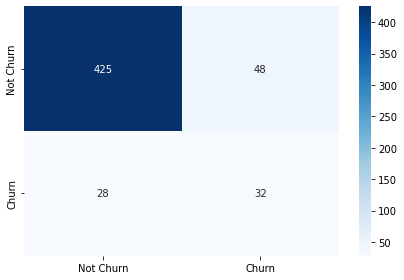

Test Confusion matrix


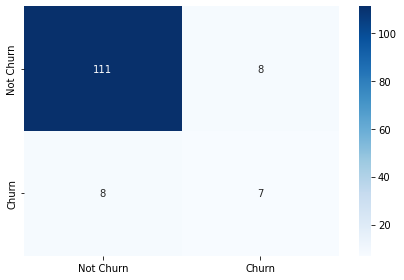

In [45]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.020)
clf_.fit(X_train_selected,y_train)
y_train_pred = clf_.predict(X_train_selected)
y_test_pred = clf_.predict(X_test_selected)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

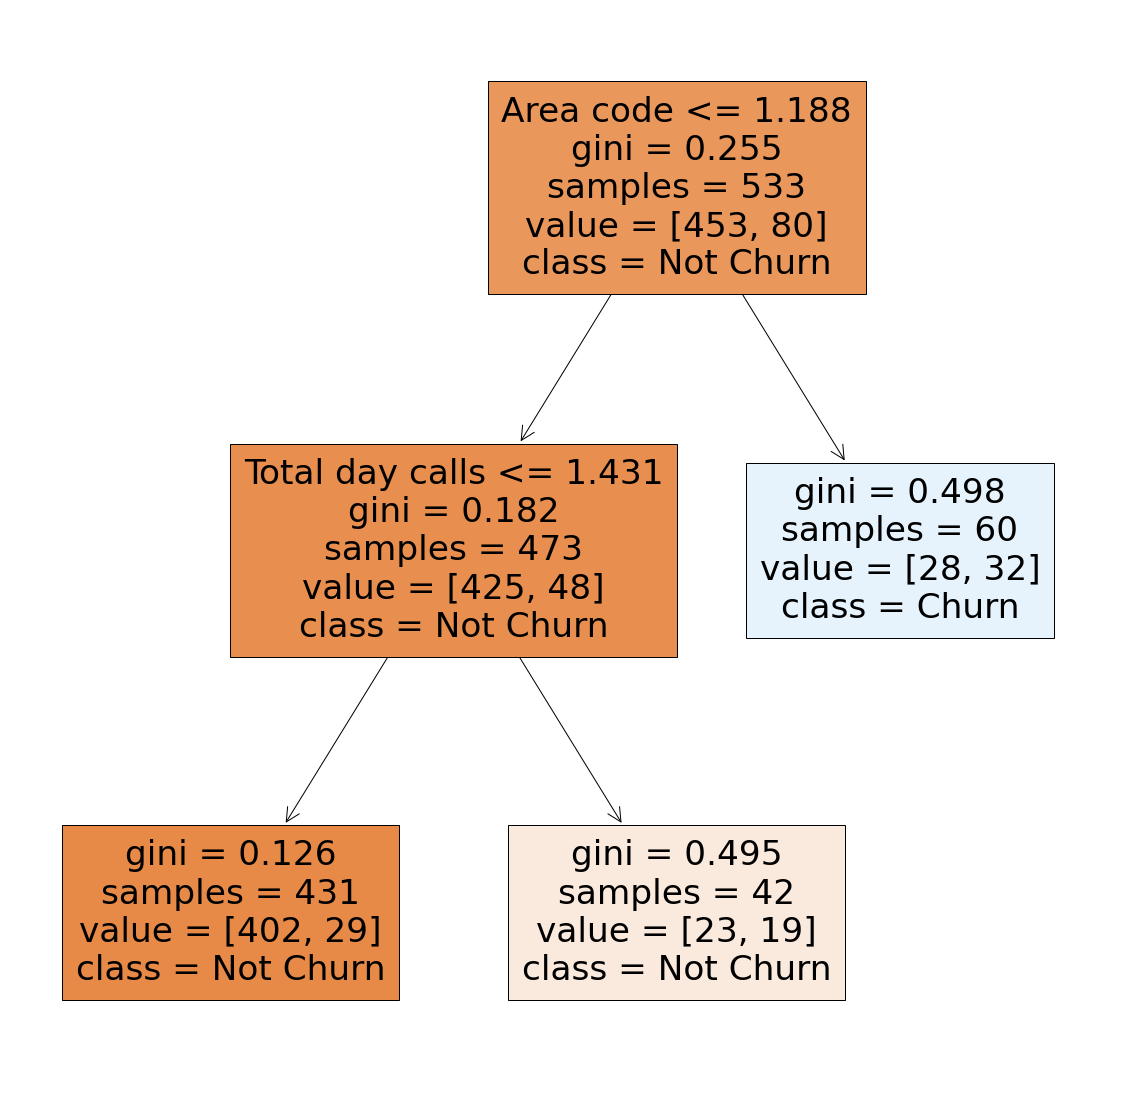

In [46]:
plt.figure(figsize=(20,20))
features = X.columns
classes = ['Not Churn', 'Churn']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()

In [47]:
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 88.06%
